# K Nearest Neighbor classification
## Introduction
In a classification problem, each input $\mathbf{x}$ has a corresponding class label, $c^n \in \{1, \cdots, C \}$. 
Given a data set of $N$ training examples, $D=\{\mathbf{x}^n, c^n \}, n=1, \cdots, N$ and new test data $\mathbf{x}_t$, the goal is predict the correct class $c_t(\mathbf{x}_t)$.

K-Nearest Neighbor (KNN) is commonly used for a classification algorithm. 
The Figure below presents an example of KNN classification.
The test data point (green circle) can be classified either to the first class (blue squares) or to the second class (red triangles). If we use Nearest Neighbor algorithm, the test data point is assigned to be in the second class, because it has the closest distance to a red triangle.
In KNN, $K$ is an extra paramater to be determined, that is the number of the nearest neigbor.
If we select $K = 3$ (solid line circle), the test data is assigned to the second class because there are two red triangles and only one blue square inside the inner circle. However, if we select $K = 5$ (dashed line circle), the test data is assigned to the first class (three squares vs. two triangles inside the outer circle).

<table>
<tr><td>
<img src="images/KnnClassification.png" width="400px">
</td></tr>
<tr><td>
Example of K-Nearest Neighbor (KNN) classification.
</td></tr>
</table><br>

The algorithm of KNN classification can be summarized as following:

<table>
  <tr>
    <td>
    <b>Step 1</b>: Determine paramater of $K$ as the number of nearest neigbors; <br/> 
    <b>Step 2</b>: Calculate the dissimilarity of the test point $\mathbf{x}_t$ to each of the training data, $d(\mathbf{x}_t,\mathbf{x}^n)$, where $n=1, \cdots , N$; <br/>
    <b>Step 3</b>: Sort the distance and determine the nearest neigbors based on K-th minimum distance; <br/>
    <b>Step 4</b>: Gather categories of the nearest neigbors; <br/>
    <b>Step 5</b>: Assign the class label $c_t(\mathbf{x}_t)$ using the simple majority of nearest neigbors as the prediction class; <br/> 
  </td>
  </tr>
</table>

## Tutorial 1: KNN classification on synthetic data
In this tutorial, we attempt to classify a test point, either to the first group or the second group. All training data and also a test data are generated.
Here, we will use the same synthetic data as in tutorial of K-means clustering.  But, in this case, we will label each group as output. 

First we import all necessary libraries and then we generate training data.

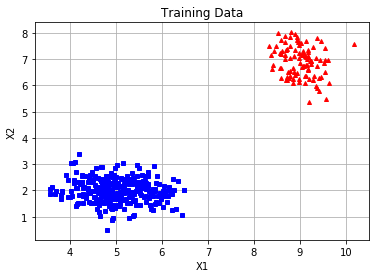

In [2]:
from pyKNN import KNN # This imports the KNN function (which we created)
import numpy as np # This imports numpy
import matplotlib.pyplot as plt # This imports matplotlib library for plotting

# First, we generate synthetic data (the same as Kmeans clustering data)

# We create synthetic data using two Gaussian distributions
# We determine the mean and standard deviation of two Gaussian distributions
mu1=np.array([5,2]); sigma1=np.array([[0.4,-0.0255],[-0.0255,0.2]])
mu2=np.array([9,7]); sigma2=np.array([[0.10,0],[0,0.4]])

# We determine the number of data points on each Gaussian distribution
N1=300; N2=100

# We add these properties into multivariate normal dist. function in numpy
X1=np.random.multivariate_normal(mu1, sigma1, N1)
X2=np.random.multivariate_normal(mu2, sigma2, N2)
X=np.concatenate((X1, X2), axis=0) # combine X1 and X2 as data X

# Second, because KNN is a supervise learning algorithm, we need to label the above data
Y=np.zeros((N1+N2,1)) # Output initiation
Y[0:N1,0]=1  # The first data, we label as class 1
Y[N1:N2,0]=2 # The second data, we label as class 2

Data=np.concatenate((Y,X),1)

# Third, we use all data as training data (we will give a testinput later)
noTrain=N1+N2 # Determine the number of training points
traindata=Data[0:noTrain-1,:]

# Fourth, we plot the synthetic data based on two Gaussian distribution function 
plt.plot(X1[:,0],X1[:,1],'bs',linewidth=2.0,markersize=4.0)
plt.plot(X2[:,0],X2[:,1],'r^',linewidth=2.0,markersize=4.0)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training Data')
plt.grid()
plt.show()

After we produced training data, now we generate test data. 
We select one data point as a test point. We label the test data based on our visualization, to know which class this data point should belong to. Below we select test data point at coordinate [7,4] and we know through visualization (from the distance), it should be in the class 1 (blue squares).

In [2]:
Xt=np.array([7,4]); # We select the test input coordinate
Xt=np.transpose(Xt.reshape((np.size(Xt,axis=0), 1)))
LabelTest=1 # From the above Figure, we assume we know that the above test point belongs to class 1
Yt=np.array([LabelTest,]);
Yt=np.transpose(Yt.reshape((np.size(Yt,axis=0), 1)))

testdata=np.concatenate((Yt,Xt),1) # as training set, we concatenate test input and test output

Now we have the training data and a test data point as well as their correspondent outputs.
Next, we apply <i>KNN</i> function (remember that we imported this function earlier: "<i>from pyKNN import KNN</i>").

Firstly, we need to select the number of nearest neigbor, $K$ snd then we pass arguments of training data and test data as well as $K$ into <i>KNN</i> function. 
This returns <i>expclass</i> and confusion matrix (<i>CM</i>). The <i>expclass</i> is the predicted class of test point. A confusion matrix is a table that is often used to describe the performance of a classification model. In this case, we do not print this, because we only have a test point. We will use the confusion matrix in the second exercise.

TestData KNN-ClassPrediction
[[ 1.  1.]]


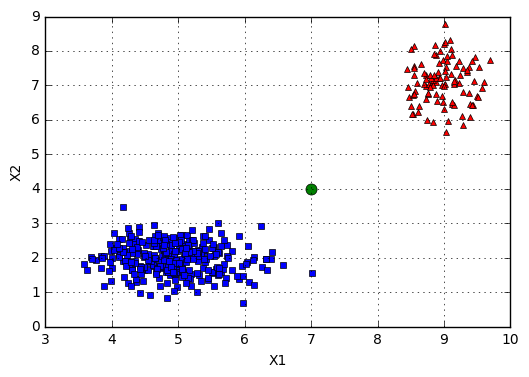

In [3]:
K=3 # Determine the number of nearest neigbor

expclass, CM = KNN(traindata, testdata, K) # Apply KNN

testdata1=testdata[:,0]
testdata1=testdata1.reshape((np.size(testdata1,axis=0), 1))

Results = np.concatenate((testdata1,expclass),axis=1) 
print 'TestData','KNN-ClassPrediction'
print Results

# We plot the synthetic data based on two Gaussian distribution function 
plt.plot(X1[:,0],X1[:,1],'bs',linewidth=2.0,markersize=4.0)
plt.plot(X2[:,0],X2[:,1],'r^',linewidth=2.0,markersize=4.0)
plt.plot(Xt[:,0],Xt[:,1],'go',linewidth=2.0,markersize=8.0)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

## Exercise 1: KNN classification on modified synthetic data
Feel free to modify the generated training data and testing data in the above tutorial and observe KKN performance. You can make two groups closer and produce more data points. You may also want to modify the value of $K$.

## Tutorial 2: KNN classification on wine data
In the second tutorial, we will apply KNN on chemical wine data. The chemical properties of wine data was described in the section of PCA. The original wine data comprises input and output. 
This data is the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. Hence, we labeled three different classes of wine based on their cultivars.

First we imports all necessary libraries and load the input and output data sets. Next, we randomize the data and divide the data to be training and testing data. Subsequently, we select the value of $K$ and we implement <i>KNN</i> function to return the predicted classes of test data and the confusion matrix (as classification peformance metric). At the end, we compare the results of predicted classes and actual classes.

In [4]:
from pyKNN import KNN # This imports the KNN function (which we created)
import numpy as np
from scipy import stats
from sklearn.metrics import confusion_matrix

# We load the input and output data:
dataIn = np.genfromtxt('./data/wineInputs.txt', delimiter=',')
dataOut = np.genfromtxt('./data/wineOutputs.txt', delimiter=',')

# We rechape the output data:
dataOut=dataOut.reshape((np.size(dataOut,axis=0), 1))
    # to fix the tuple, the original size of dataOut =[178,0]
    # by using reshape(178,1), we add the col=1

# We concatenate two arrays, so input and output are stored in the same array:
DataWine=np.concatenate((dataOut,dataIn),1)

[i,j]=np.shape(DataWine) # Get matrix dim of DataWine

P=np.random.permutation(i) # We randomize the data

# We use the first one hundred samples as training set whereas the remaining one is the test set:
noTrain=100 # Determine the number of training points
P1=P[0:noTrain] 
P2=P[noTrain:i-1]
traindata=DataWine[P1,:]
testdata=DataWine[P2,:]

K=3 # Determine the number of class

expclass, CM = KNN(traindata, testdata, K)

testdata1=testdata[:,0]
testdata1=testdata1.reshape((np.size(testdata1,axis=0), 1))

print 'Confusion Matrix'
print CM

Results = np.concatenate((testdata1,expclass),axis=1) 
print 'TestData','KNN-ClassPrediction'
print Results


Confusion Matrix
[[28  0  0]
 [ 5 23  0]
 [ 0  0 21]]
TestData KNN-ClassPrediction
[[ 2.  2.]
 [ 3.  3.]
 [ 3.  3.]
 [ 1.  1.]
 [ 2.  2.]
 [ 3.  3.]
 [ 1.  1.]
 [ 3.  3.]
 [ 2.  2.]
 [ 1.  1.]
 [ 3.  3.]
 [ 2.  2.]
 [ 3.  3.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 3.  3.]
 [ 1.  1.]
 [ 1.  1.]
 [ 3.  3.]
 [ 2.  2.]
 [ 1.  1.]
 [ 2.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 2.  2.]
 [ 3.  3.]
 [ 1.  1.]
 [ 2.  2.]
 [ 3.  3.]
 [ 3.  3.]
 [ 2.  1.]
 [ 3.  3.]
 [ 2.  2.]
 [ 2.  2.]
 [ 3.  3.]
 [ 2.  2.]
 [ 2.  2.]
 [ 1.  1.]
 [ 3.  3.]
 [ 1.  1.]
 [ 2.  2.]
 [ 1.  1.]
 [ 3.  3.]
 [ 3.  3.]
 [ 1.  1.]
 [ 2.  2.]
 [ 1.  1.]
 [ 2.  2.]
 [ 2.  2.]
 [ 1.  1.]
 [ 2.  2.]
 [ 1.  1.]
 [ 2.  1.]
 [ 2.  2.]
 [ 1.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 1.  1.]
 [ 3.  3.]
 [ 1.  1.]
 [ 1.  1.]
 [ 3.  3.]
 [ 2.  2.]
 [ 2.  2.]
 [ 2.  2.]
 [ 1.  1.]
 [ 3.  3.]
 [ 2.  2.]
 [ 2.  2.]
 [ 1.  1.]
 [ 3.  3.]
 [ 2.  1.]
 [ 2.  2.]
 [ 3.  3.]]


## Exercise 2: PCA-KNN classification on wine data
<ul>
  <li>Modify the value of $K$ and compare the results, the randomization should be fixed to have a fair comparison. </li>
  <li>Apply PCA on the input data, and take the first three Principal Components (PCs), correspond to the highest variance of PCs. Include the first three PCs as input to KNN algorithm (instead of the original data). Compare the confusion matrix!</li>
</ul>
